In [23]:
import pandas as pd
file_path = "Strawberry_Greenhouse.csv"
greenhouse_df = pd.read_csv(file_path)

In [25]:
greenhouse_df

,EnqueuedTimeUtc,deviceId,humidity,temparature,irTemparature
0,16/02/2023 13:41:57,290EC1B,83,14,10
1,16/02/2023 13:41:57,290EF53,83,14,12
2,16/02/2023 13:41:58,290F190,88,13,12
3,16/02/2023 13:41:59,290F39C,84,13,11
4,16/02/2023 13:41:59,290F362,89,12,11
...,...,...,...,...,...
371074,22/12/2023 09:14:15,290F362,68,13,14
371075,22/12/2023 09:17:57,2908E26,70,13,13
371076,22/12/2023 09:18:15,290F362,67,13,14
371077,22/12/2023 09:21:57,2908E26,70,13,13


In [27]:
greenhouse_df.head()

,EnqueuedTimeUtc,deviceId,humidity,temparature,irTemparature
0,16/02/2023 13:41:57,290EC1B,83,14,10
1,16/02/2023 13:41:57,290EF53,83,14,12
2,16/02/2023 13:41:58,290F190,88,13,12
3,16/02/2023 13:41:59,290F39C,84,13,11
4,16/02/2023 13:41:59,290F362,89,12,11


In [29]:
greenhouse_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371079 entries, 0 to 371078
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   EnqueuedTimeUtc  371079 non-null  object
 1   deviceId         371079 non-null  object
 2   humidity         371079 non-null  int64 
 3   temparature      371079 non-null  int64 
 4   irTemparature    371079 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 14.2+ MB


In [31]:
greenhouse_df.describe()

,humidity,temparature,irTemparature
count,371079.000000,371079.000000,371079.000000
mean,70.233212,10.857437,14.718577
std,27.817407,6.505052,15.454556
min,0.000000,-40.000000,-40.000000
25%,69.000000,8.000000,9.000000
50%,80.000000,11.000000,12.000000
75%,86.000000,15.000000,18.000000
max,100.000000,31.000000,59.000000


In [33]:
greenhouse_df.isnull().sum()

EnqueuedTimeUtc    0
deviceId           0
humidity           0
temparature        0
irTemparature      0
dtype: int64

In [35]:
greenhouse_df.duplicated().sum()

360

In [37]:
greenhouse_df.rename(columns={'temparature': 'temperature', 'irTemparature': 'irTemperature'}, inplace=True)

In [39]:
greenhouse_df['EnqueuedTimeUtc'] = pd.to_datetime(greenhouse_df['EnqueuedTimeUtc'], dayfirst=True)

In [40]:
invalid_condition = (
    (greenhouse_df['temperature'] == -40) |
    (greenhouse_df['irTemperature'] == -40) |
    (greenhouse_df['humidity'] == 0)
)

greenhouse_df_cleaned = greenhouse_df[~invalid_condition].copy()

In [43]:
greenhouse_df_cleaned.describe()

,EnqueuedTimeUtc,humidity,temperature,irTemperature
count,324358,324358.000000,324358.000000,324358.000000
mean,2023-10-16 12:43:12.029387008,80.033506,12.485562,13.177622
min,2023-02-16 13:41:57,29.000000,-15.000000,-34.000000
25%,2023-10-11 09:22:02.249999872,75.000000,9.000000,9.000000
50%,2023-11-03 12:17:59.500000,82.000000,12.000000,12.000000
75%,2023-11-27 13:05:57.750000128,87.000000,16.000000,17.000000
max,2023-12-22 09:25:57,100.000000,31.000000,58.000000
std,NaN,9.950190,4.658488,5.037896


In [45]:
greenhouse_df_cleaned.duplicated().sum()

334

In [47]:
greenhouse_df_cleaned = greenhouse_df_cleaned.drop_duplicates().reset_index(drop=True)

In [49]:
greenhouse_df_cleaned.duplicated().sum()

0

In [51]:
print("\nExpanded statistical analysis:")
print(greenhouse_df_cleaned[['humidity', 'temperature', 'irTemperature']].describe())
print("\nSkewness:")
print(greenhouse_df_cleaned[['humidity', 'temperature', 'irTemperature']].skew())
print("\nKurtosis:")
print(greenhouse_df_cleaned[['humidity', 'temperature', 'irTemperature']].kurt())


Expanded statistical analysis:
            humidity    temperature  irTemperature
count  324024.000000  324024.000000  324024.000000
mean       80.034683      12.483372      13.175694
std         9.946546       4.656680       5.036812
min        29.000000     -15.000000     -34.000000
25%        75.000000       9.000000       9.000000
50%        82.000000      12.000000      12.000000
75%        87.000000      16.000000      17.000000
max       100.000000      31.000000      58.000000

Skewness:
humidity        -0.899764
temperature      0.507141
irTemperature    0.437292
dtype: float64

Kurtosis:
humidity         1.052909
temperature      0.037876
irTemperature    0.306208
dtype: float64


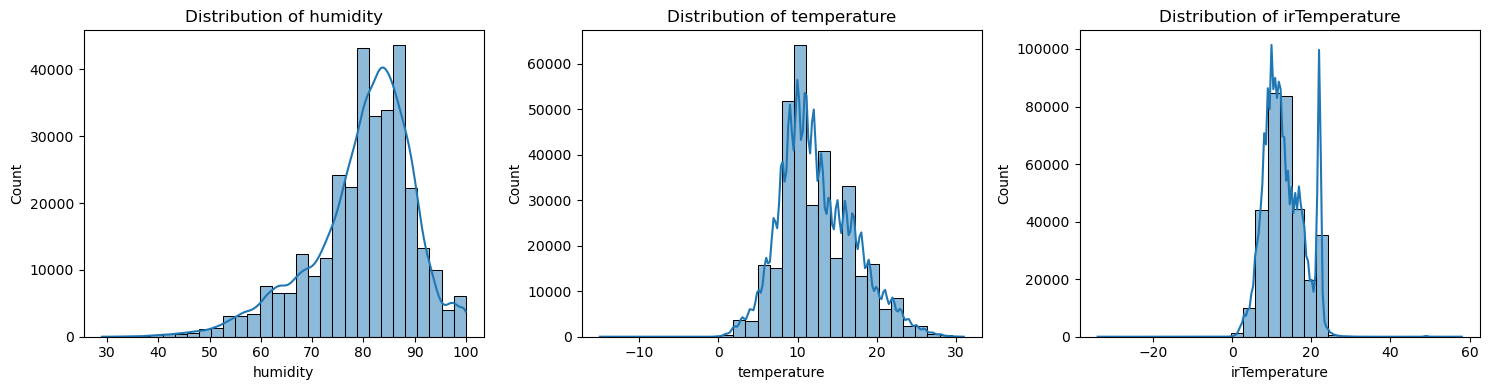

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 4))
for i, column in enumerate(['humidity', 'temperature', 'irTemperature']):
    plt.subplot(1, 3, i+1)
    sns.histplot(greenhouse_df_cleaned[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


Correlation matrix:
               humidity  temperature  irTemperature
humidity       1.000000    -0.550332      -0.274627
temperature   -0.550332     1.000000       0.735520
irTemperature -0.274627     0.735520       1.000000


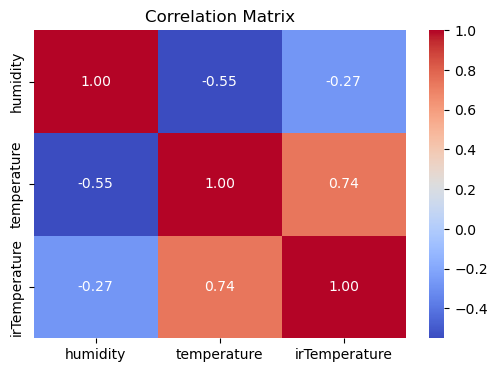

In [54]:
correlation_matrix = greenhouse_df_cleaned[['humidity', 'temperature', 'irTemperature']].corr()
print("\nCorrelation matrix:")
print(correlation_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

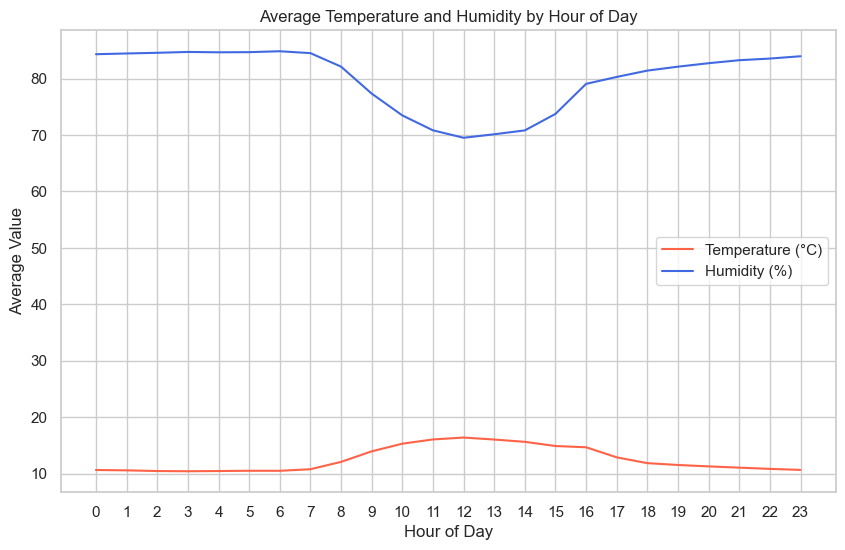

In [55]:
import numpy as np
sns.set_theme(style="whitegrid")
greenhouse_df_cleaned['hour'] = greenhouse_df_cleaned['EnqueuedTimeUtc'].dt.hour
hourly_avg = greenhouse_df_cleaned.groupby('hour')[['temperature', 'humidity']].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_avg, x=hourly_avg.index, y='temperature', label='Temperature (°C)', color='tomato')
sns.lineplot(data=hourly_avg, x=hourly_avg.index, y='humidity', label='Humidity (%)', color='royalblue')
plt.title('Average Temperature and Humidity by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Value')
plt.legend()
plt.xticks(range(0, 24))
plt.savefig('plot1.png')
plt.show()

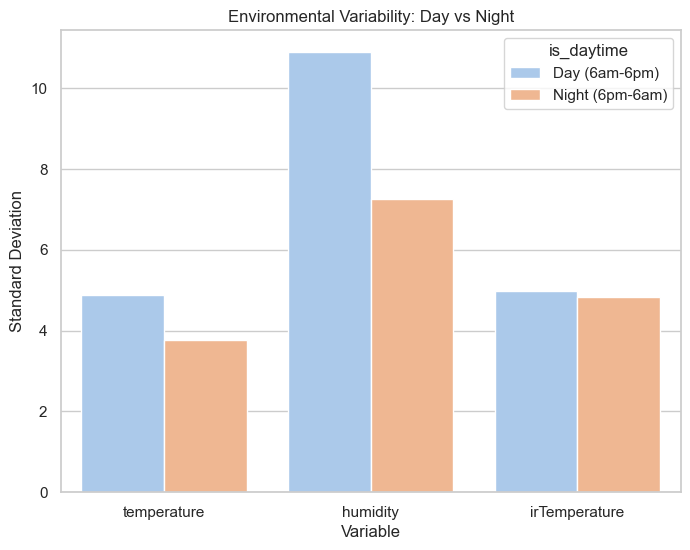

In [56]:
greenhouse_df_cleaned['is_daytime'] = greenhouse_df_cleaned['hour'].apply(lambda x: 'Day (6am-6pm)' if 6 <= x < 18 else 'Night (6pm-6am)')
var_by_period = greenhouse_df_cleaned.groupby('is_daytime')[['temperature', 'humidity', 'irTemperature']].std().reset_index().melt(id_vars='is_daytime', var_name='Variable', value_name='StdDev')

plt.figure(figsize=(8, 6))
sns.barplot(data=var_by_period, x='Variable', y='StdDev', hue='is_daytime', palette='pastel')
plt.title('Environmental Variability: Day vs Night')
plt.ylabel('Standard Deviation')
plt.savefig('plot2.png')
plt.show()

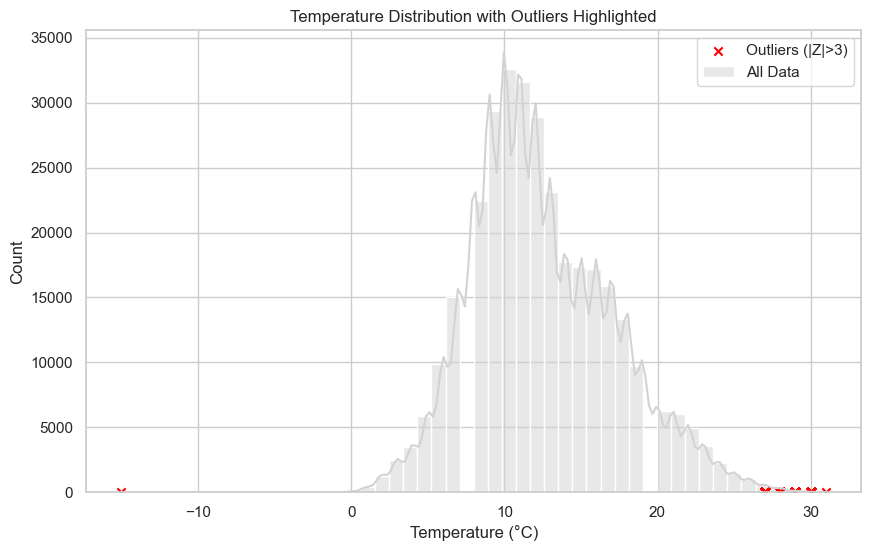

In [57]:
from scipy.stats import zscore
greenhouse_df_cleaned['temp_z'] = zscore(greenhouse_df_cleaned['temperature'])
outliers = greenhouse_df_cleaned[np.abs(greenhouse_df_cleaned['temp_z']) > 3]

plt.figure(figsize=(10, 6))
sns.histplot(greenhouse_df_cleaned['temperature'], bins=50, kde=True, color='lightgray', label='All Data')
plt.scatter(outliers['temperature'], np.zeros(len(outliers)), color='red', label='Outliers (|Z|>3)', marker='x')
plt.title('Temperature Distribution with Outliers Highlighted')
plt.xlabel('Temperature (°C)')
plt.legend()
plt.savefig('plot3.png')
plt.show()